# Problema das 8 Rainhas

O problema das 8 rainhas é um desafio clássico na área de computação. O objetivo é posicionar 8 rainhas em um tabuleiro de xadrez de 8x8 células, de forma que nenhuma rainha possa atacar as outras. Isso significa que nenhuma rainha deve compartilhar a mesma linha, coluna ou diagonal com outra.

## Representação do Problema

### Tabuleiro
O tabuleiro é representado por uma matriz 8x8 onde cada posição pode conter uma rainha ou ser vazia.
Sendo assim, resolvi representar cada indivíduo como uma lista de 8 posições [1, 2, 3, 4, 5, 6, 7, 8], onde cada posição contém o índice da casa que a rainha está, caso [1, 4, 6, 2, 5, 3, 7, 8]:

| 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 |   |
|---|---|---|---|---|---|---|---|---|
|   |   |   |   |   |   |   | Q | 8 |
|   |   |   |   |   |   | Q |   | 7 |
|   |   | Q |   |   |   |   |   | 6 |
|   |   |   |   | Q |   |   |   | 5 |
|   | Q |   |   |   |   |   |   | 4 |
|   |   |   |   |   | Q |   |   | 3 |
|   |   |   | Q |   |   |   |   | 2 |
| Q |   |   |   |   |   |   |   | 1 |


## Parâmetros do Algoritmo Genético (atividade)

| Aspecto                 | Detalhes                         |
|-------------------------|----------------------------------|
| Representação           | Inteira                          |
| Recombinação            | Cruzamento de um ponto           |
| Mutação                 | Swap                             |
| Seleção dos pais        | 2 melhores de 5 aleatórios       |
| Seleção de sobreviventes| Substituir os piores             |
| Tamanho da população    | 100                              |
| Número de descendentes  | 2                                |
| Inicialização           | Aleatória                        |
| Critério de Parada      | 1000 gerações                    |


### Importações 

In [1]:
import random
import matplotlib.pyplot as plt

### Funções

### Funções do Algoritmo Genético para Resolver o Problema das N-Rainhas

1. **`criar_populacao(tamanho_populacao)`**
    - Esta função cria e retorna uma população inicial de indivíduos, onde cada indivíduo representa uma disposição aleatória das rainhas em um tabuleiro de tamanho N (nesse caso 8).

2. **`calcular_fitness(individuo)`**
    - Calcula e retorna o valor de aptidão (fitness) de um indivíduo. No contexto do problema das N-rainhas, a função avalia quantos pares de rainhas não se atacam na mesma linha, coluna ou diagonal.

3. **`calcular_fitness_medio(populacao)`**
    - Calcula e retorna o fitness médio de toda a população atual.

4. **`selecionar_mais_autos(populacao, qtd_selec, qtd_melhores)`**
    - Seleciona os N indivíduos aleatoriamente e retorna os m melhores deles

5. **`mutacao_swap(individuo)`**
    - Realiza uma mutação em um indivíduo trocando aleatoriamente duas posições no seu cromossomo.

6. **`substituir_por_melhores(populacao, novos_individuos)`**
    - Substitui os indivíduos menos aptos da população pelos novos indivíduos gerados com base no seu fitness. Isso mantém a evolução da população ao longo das gerações.

7. **`encontrar_maior_fitness(populacao)`**
    - Encontra e retorna o indivíduo com o maior fitness dentro da população, juntamente com o valor desse fitness.

8. **`cruzamento_dois_pontos(pai1, pai2)`**
    - Realiza o cruzamento de dois indivíduos em dois pontos de corte diferentes para gerar dois filhos.

9. **`cruzamento_um_ponto(pai1, pai2)`**
    - Realiza o cruzamento de dois indivíduos em um ponto de corte para gerar dois filhos.

10. **`cruzamento_dois_pontos_com_swap(pai1, pai2)`**
    - Combina o cruzamento de dois pontos com a mutação por swap nos filhos gerados.

11. **`cruzamento_um_ponto_e_mutacao(pai1, pai2)`**
    - Realiza o cruzamento de um ponto entre dois pais e, em seguida, aplica a mutação por swap nos filhos gerados.

12. **`mostrar_grafico(listas, labels)`**
    - Função para visualização dos resultados em um gráfico de linhas que exibe a evolução do fitness ao longo das gerações do algoritmo genético.


In [2]:
def criar_populacao(tamanho_populacao):
    populacao = []                                                  # lista que representa um individuo
    for _ in range(tamanho_populacao):
        individuo = list(range(1, 9))                               # gera o individuo
        random.shuffle(individuo)                                   # randomiza a posição do indivíduo
        populacao.append(individuo)
    return populacao                                                # retorna a lista de indivíduos 

def calcular_fitness(individuo):
    ataques = 0                                                     # inicia os ataques como 0
    tamanho_tabuleiro = len(individuo)                              # tamanho do tabuleiro

    for i in range(tamanho_tabuleiro):
        for j in range(i + 1, tamanho_tabuleiro):

            # Verifica se as rainhas se atacam na mesma linha ou diagonal
            if individuo[i] == individuo[j] or abs(individuo[i] - individuo[j]) == abs(i - j):
                ataques += 1
    fitness = tamanho_tabuleiro * (tamanho_tabuleiro - 1) // 2 - ataques # calcula o numero de ataques maximo do cenário e divide por 2 já que uma rainha ataca a outra e esse valor é 
    #contabilizado 2 vezes mas o que importa são os pares 
    return fitness

def calcular_fitness_medio(populacao): # apenas retorna a media de fitness, bem simples
    total_fitness = 0

    for individuo in populacao:
        total_fitness += calcular_fitness(individuo)

    fitness_medio = total_fitness / len(populacao)
    return fitness_medio

def selecionar_mais_autos(populacao, qtd_selec, qtd_melhores): 
    # Seleciona aleatoriamente 5 indivíduos da população
    selecionados = random.sample(populacao, qtd_selec)

    # Ordena os indivíduos selecionados com base no seu fitness
    selecionados = sorted(selecionados, key=calcular_fitness)

    # Retorna os 2 indivíduos com o fitness mais autos
    mais_autos = selecionados[-qtd_melhores:] # como a lista esta ordenada assim sou capas de pegar apenas os ultimos valores
    return mais_autos

# Mutação (Swap)
def mutacao_swap(individuo):
    posicao1, posicao2 = random.sample(range(len(individuo)), 2)
    individuo[posicao1], individuo[posicao2] = individuo[posicao2], individuo[posicao1]
    return individuo

def substituir_por_melhores(populacao, novos_individuos):
    # Ordena os novos indivíduos com base no seu fitness
    novos_individuos.sort(key=calcular_fitness)

    # Ordena a população atual com base no seu fitness
    populacao.sort(key=calcular_fitness)
    
    # Substitui os indivíduos menos aptos da população pelos novos indivíduos (de maior fitness)
    for i in range(len(novos_individuos)):
        populacao[i] = novos_individuos[i] # realiza a substituição em si

    return populacao

def encontrar_maior_fitness(populacao): # ajuda no plot encontrando a melhor solução da geração
    maior_fitness = 0  # Inicializa com um valor grande
    individuo_maior_fitness = None

    for individuo in populacao:
        fitness_atual = calcular_fitness(individuo)
        if fitness_atual > maior_fitness:
            maior_fitness = fitness_atual
            individuo_maior_fitness = individuo

    return individuo_maior_fitness, maior_fitness # melhor individuo e seu fitnnes

# Recombinação (Cruzamento de dois pontos)
def cruzamento_dois_pontos(pai1, pai2):

    ponto_corte1 = random.randint(1, len(pai1) - 1)
    ponto_corte2 = random.randint(ponto_corte1 + 1, len(pai1))
    
    filho1 = pai1[:ponto_corte1] + pai2[ponto_corte1:ponto_corte2] + pai1[ponto_corte2:]
    filho2 = pai2[:ponto_corte1] + pai1[ponto_corte1:ponto_corte2] + pai2[ponto_corte2:]

    return [filho1, filho2]

# Recombinação (Cruzamento de um ponto)
def cruzamento_um_ponto(pai1, pai2):
    ponto_corte = random.randint(1, len(pai1) - 1)
    filho1 = pai1[:ponto_corte] + pai2[ponto_corte:]
    filho2 = pai2[:ponto_corte] + pai1[ponto_corte:]
    return [filho1, filho2]

# Recombinação (Cruzamento de dois pontos + swao)
def cruzamento_dois_pontos_com_swap(pai1, pai2):
    ponto_corte1 = random.randint(1, len(pai1) - 1)
    ponto_corte2 = random.randint(ponto_corte1 + 1, len(pai1))

    filho1 = pai1[:ponto_corte1] + pai2[ponto_corte1:ponto_corte2] + pai1[ponto_corte2:]
    filho2 = pai2[:ponto_corte1] + pai1[ponto_corte1:ponto_corte2] + pai2[ponto_corte2:]

    filho1_mutado = mutacao_swap(filho1)
    filho2_mutado = mutacao_swap(filho2)

    return [filho1_mutado, filho2_mutado]

# Recombinação (Cruzamento de um pontos + swao)
def cruzamento_um_ponto_e_mutacao(pai1, pai2):
    # Cruzamento de um ponto para gerar dois filhos
    filho1, filho2 = cruzamento_um_ponto(pai1, pai2)
    
    # Aplica mutação por swap nos filhos gerados
    filho1_mutado = mutacao_swap(filho1)
    filho2_mutado = mutacao_swap(filho2)
    
    return [filho1_mutado, filho2_mutado]

def mostrar_grafico(listas, labels): # somostra o grafico final
    geracoes = range(len(listas[0]))  # Assume-se que todas as listas têm o mesmo comprimento

    for i, lista in enumerate(listas):
        plt.plot(geracoes, lista, label=labels[i], linewidth=1)

    plt.xlabel('Geração')
    plt.ylabel('Fitness')
    plt.title('Gráfico de Linhas com Múltiplas Séries')
    plt.legend()
    plt.show()


In [3]:

def algoritmo_genetico(qtd_pop, qtg_gem, qtd_selec, qtd_melhores, modelo): # main
    populacao = criar_populacao(qtd_pop) # cria a população
    medio_fit = []

    for x in range(qtg_gem): # contador da geração
        selec = selecionar_mais_autos(populacao, qtd_selec, qtd_melhores)
        mutados = []

        # seletor de algoritimo

        if modelo == "Cruzamento_dois_pontos":
            mutados = cruzamento_dois_pontos(selec[0], selec[1])

        elif modelo == "Cruzamento_1_ponto":
            mutados = cruzamento_um_ponto(selec[0], selec[1])

        elif modelo == "Cruzamento_1_ponto_sw":
            mutados = cruzamento_um_ponto_e_mutacao(selec[0], selec[1])

        elif modelo == "Cruzamento_dois_pontos_com_swap":
            mutados = cruzamento_dois_pontos_com_swap(selec[0], selec[1])

        populacao = substituir_por_melhores(populacao, mutados)
        medio_fit.append(calcular_fitness_medio(populacao))
    
    return medio_fit, encontrar_maior_fitness(populacao) # retorno padrão

### Main

Melhor: [4, 7, 1, 6, 2, 6, 8, 3], resultado: 27, Tecnica: Cruzamento_1_ponto
Melhor: [6, 2, 7, 1, 4, 8, 5, 3], resultado: 28, Tecnica: Cruzamento_1_ponto_sw
Melhor: [4, 7, 5, 2, 6, 1, 3, 5], resultado: 27, Tecnica: cruzamento_dois_pontos
Melhor: [7, 3, 1, 6, 8, 5, 2, 4], resultado: 28, Tecnica: cruzamento_dois_pontos_com_swap


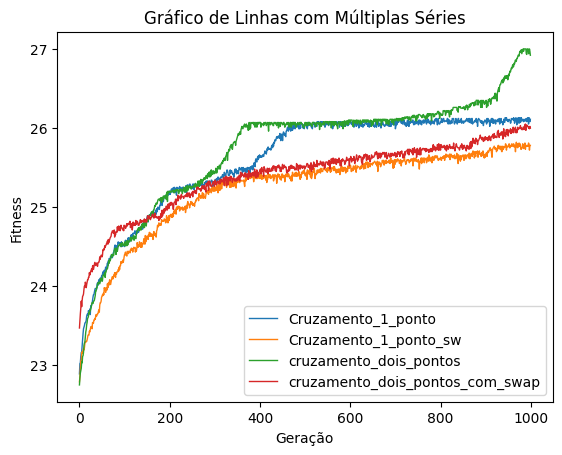

In [4]:
numero_gens = 1000
numero_selec = 10
numero_melhores = 5
numero_pop = 100

# Exemplo de uso do algoritmo genético com suas funções definidas
listas = []
labels = []
melhores = []

jogada = algoritmo_genetico(numero_pop, numero_gens, numero_selec, numero_melhores, "Cruzamento_1_ponto")
listas.append(jogada[0])
melhores.append(jogada[1])
labels.append("Cruzamento_1_ponto")

jogada = algoritmo_genetico(numero_pop, numero_gens, numero_selec, numero_melhores, "Cruzamento_1_ponto_sw")
listas.append(jogada[0])
melhores.append(jogada[1])
labels.append("Cruzamento_1_ponto_sw")

jogada = algoritmo_genetico(numero_pop, numero_gens, numero_selec, numero_melhores, "Cruzamento_dois_pontos")
listas.append(jogada[0])
melhores.append(jogada[1])
labels.append("cruzamento_dois_pontos")

jogada = algoritmo_genetico(numero_pop, numero_gens, numero_selec, numero_melhores, "Cruzamento_dois_pontos_com_swap")
listas.append(jogada[0])
melhores.append(jogada[1])
labels.append("cruzamento_dois_pontos_com_swap")

for x in melhores:
    print(f"Melhor: {x[0]}, resultado: {x[1]}, Tecnica: {labels[melhores.index(x)]}")
mostrar_grafico(listas, labels)

In [5]:
def mostrar_tabuleiro_matplotlib(rainhas): # função simples apenas para se visualizar o tabuleiro
    tamanho = len(rainhas)

    tabuleiro = [[(i + j) % 2 for i in range(tamanho)] for j in range(tamanho)]

    plt.figure(figsize=(6, 6))
    plt.imshow(tabuleiro, cmap='binary')

    for i in range(tamanho):
        plt.text(i, tamanho - rainhas[i], 'R', ha='center', va='center', color='red', fontsize=20)

    plt.xticks([])  # Removendo os números do eixo x
    plt.yticks([])  # Removendo os números do eixo y
    plt.title('Tabuleiro de Xadrez com as Rainhas')
    plt.show()

Melhor: [4, 7, 1, 6, 2, 6, 8, 3], resultado: 27, Tecnica: Cruzamento_1_ponto


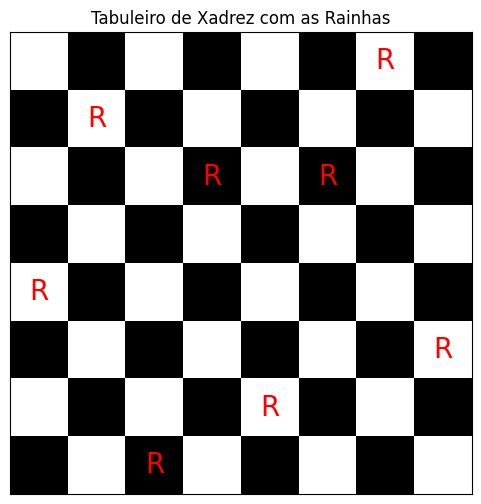

Melhor: [6, 2, 7, 1, 4, 8, 5, 3], resultado: 28, Tecnica: Cruzamento_1_ponto_sw


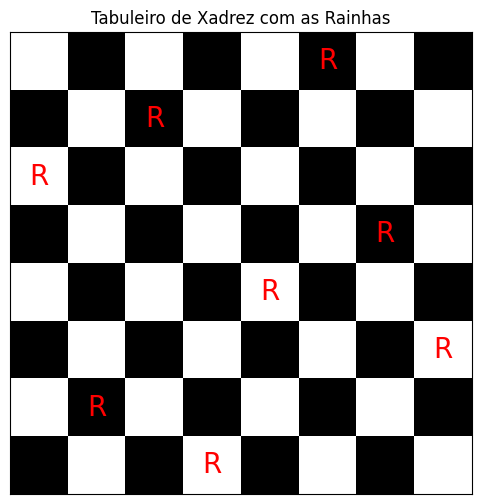

Melhor: [4, 7, 5, 2, 6, 1, 3, 5], resultado: 27, Tecnica: cruzamento_dois_pontos


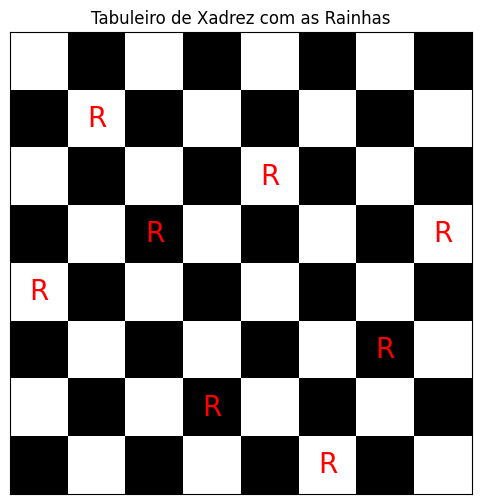

Melhor: [7, 3, 1, 6, 8, 5, 2, 4], resultado: 28, Tecnica: cruzamento_dois_pontos_com_swap


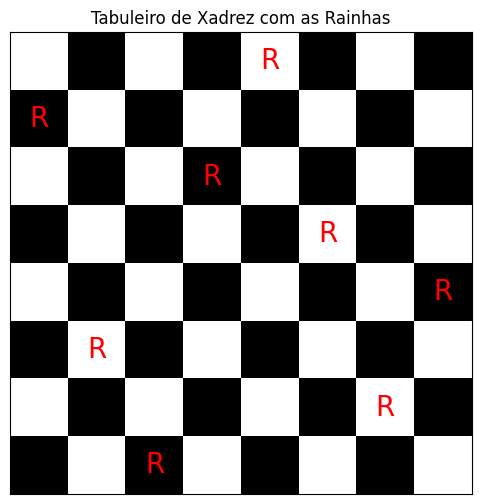

In [6]:
for x in melhores:
    print(f"Melhor: {x[0]}, resultado: {x[1]}, Tecnica: {labels[melhores.index(x)]}")
    mostrar_tabuleiro_matplotlib(x[0])